<a href="https://colab.research.google.com/github/CuciureanuDan/Lane-Detection-Project/blob/main/LaneDetectionProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##  Detection of lane markers



---


*   **Objective:** Develop an application in Python  to detect lane markers in images using numerical processing techniques, specifically leveraging the Hough Transform algorithm.

*   **Brief description:**
In driver assistance systems, lane detection plays a crucial role in enhancing road safety. Accurate lane detection can alert drivers if they unintentionally drift out of their lane or provide information about upcoming turns, whether they are mild or sharp. This project utilizes the Hough Transform algorithm to detect lane markers in images. The Hough Transform identifies lines by accumulating votes in a parameter space, followed by detecting peaks that indicate potential lines in the image, ensuring reliable and efficient lane detection.



In this project we will work with some libraries frequently used in image processing. For example, to display  images  or some graphics,we will use *matplotlib*. For reading and displaying images in common formats(e.g., JPEG,PNG) we will use *matplotlib.image*. We will also use *numpy* for numerical operations on matrices.

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from google.colab import files
from google.colab.patches import cv2_imshow
import numpy as np
import cv2

If the code runs successfully, no message will be displayed.

Firstly, we need to select the image we want to open. We'll use the *upload* function from the files module of the already imported google.colab package. After selecting the file, its name will be stored in the variable uploaded, and then assigned to imgFileName, as shown in the following cell:

In [ ]:
uploaded = files.upload()
imgFileName=list(uploaded.keys())[0]

Saving lane4.jpg to lane4.jpg


Later we will read the image we chose using the *imread* function. When calling this function, we will specify the library it belongs to(in our case cv2).

In [ ]:
ImgIn = cv2.imread(imgFileName)
if ImgIn is None:
  print("The image cannot be opened, or no image with the specified name was found.")

In this part of the code, we will display the type and dimensions of the image, then we will convert the image to grayscale using *cv2.cvtColor* and display both versions of the image. For analyzing the distribution of pixel intensities in the image we called the *hist* function.

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)


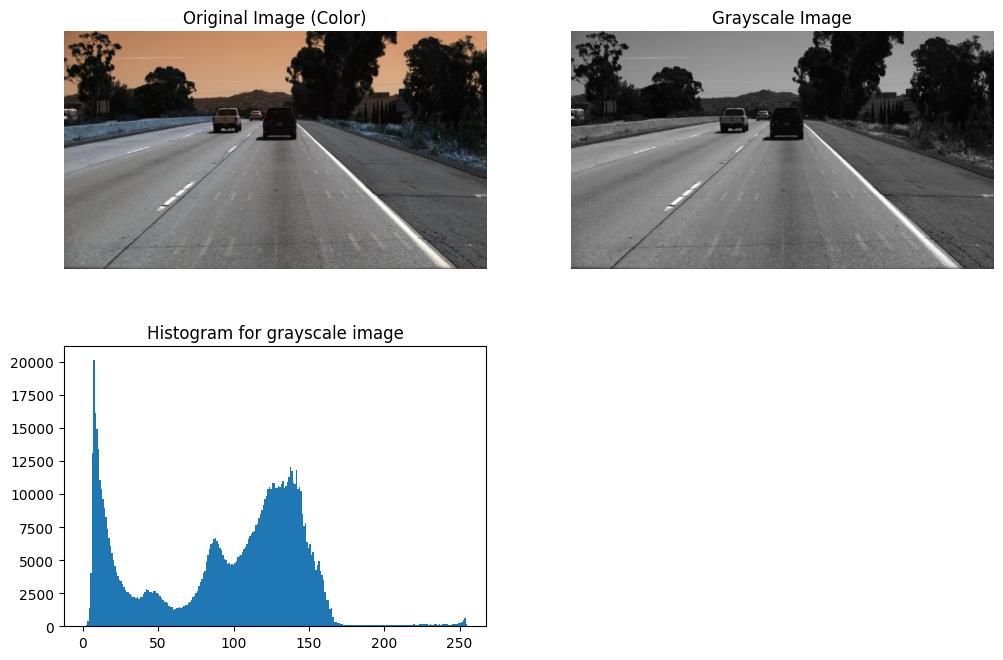

In [ ]:
print('This image is:', type(ImgIn), 'with dimesions:', ImgIn.shape)
ImgIn_gray = cv2.cvtColor(ImgIn, cv2.COLOR_BGR2GRAY) # Conversion to gray

fig, axes = plt.subplots(2, 2, figsize = (12,8))
axes[0,0].imshow(ImgIn) # cv2.cvtColor(ImgIn, cv2.COLOR_BGR2RGB))
axes[0,0].axis('off')
axes[0,0].set_title("Original Image (Color)")
axes[0,1].imshow(ImgIn_gray, cmap='gray')
axes[0,1].set_title("Grayscale Image")
axes[0,1].axis('off')
axes[1,0].hist(ImgIn_gray.ravel(),256,[0,255])
axes[1,0].set_title("Histogram for grayscale image")
axes[1,1].axis('off')

plt.show()

Identifying as many edges as possible in an image is the key to an efficient algorithm. So, it is important to eliminate any noise that may cause false edges, which can negatively impact edge detection. To reduce noise we will apply a filter known as Gaussian Blur.

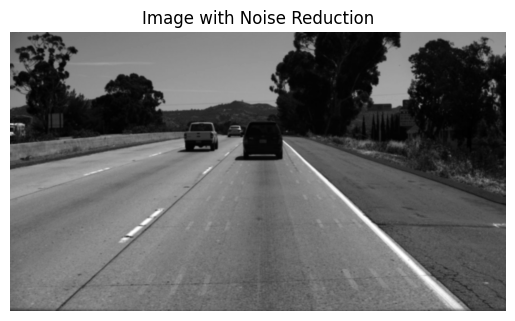

The image is grayscale.


In [ ]:
ImgIn_gray_blur = cv2.GaussianBlur(ImgIn_gray, (5, 5), 0)

plt.figure()
plt.imshow(ImgIn_gray_blur, cmap='gray')
plt.title('Image with Noise Reduction')
plt.axis('off')
plt.show()

# to check if the image is grayscale, just personal check, might delete later
if len(ImgIn_gray_blur.shape) == 2:
    print("The image is grayscale.")
else:
    print("The image is color.")

Now we apply the Canny edge detection algorithm on `ImgIn_gray_blur`. The method uses two thresholds: `t_lower` and `t_upper` , which determine the sensitivity for detecting edges. It calculates gradients using a Sobel operator with an `aperture_size` of 3 (by default). Areas with strong intensity changes (gradients) are marked as edges, producing a binary image `ImgIn_canny`, where edges appear as white lines on a black background. The result is showing prominent contours and boundaries.

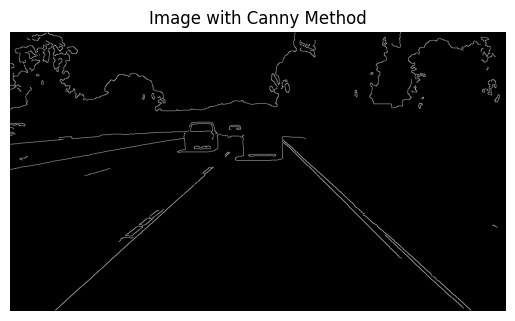

In [ ]:
t_lower = 100  # Lower Threshold
t_upper = 200  # Upper threshold
aperture_size = 3  # Aperture size

ImgIn_canny = cv2.Canny(ImgIn_gray_blur, t_lower, t_upper, apertureSize=aperture_size)

plt.figure()
plt.imshow(ImgIn_canny, cmap='gray')
plt.title('Image with Canny Method')
plt.axis('off')
plt.show()

Displaying the Canny edge-detected image with coordinate axes helps identify the pixel coordinates needed for selecting a Region of Interest (ROI). This visualization aids in precisely defining the area of the image containing lane markers, reducing noise and irrelevant features. Using the axes, we can easily determine the coordinates for creating a polygonal mask, focusing the analysis on the lane area and improving edge detection accuracy.

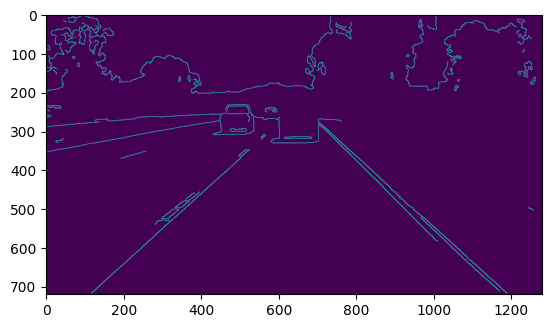

In [ ]:
plt.imshow(ImgIn_canny)
plt.show()


In this step, we create a binary mask using a polygon defined by specific vertices. The mask helps isolate the Region of Interest (ROI) where lane markers are expected. The polygon is constructed using four points: the bottom-left, bottom-right, top-right, and top-left corners, forming a trapezoidal shape. This shape is chosen based on the typical perspective view of road lanes.

The mask is generated using the `cv2.fillPoly` function, which fills the specified polygon with white (255) on a black (0) background of the same size as the Canny edge-detected image (`ImgIn_canny`). The resulting mask highlights the area of interest while filtering out irrelevant parts of the image. When visualized, this mask shows only a trapezoid on a black/magenta background, indicating the region where further lane detection analysis will be focused.

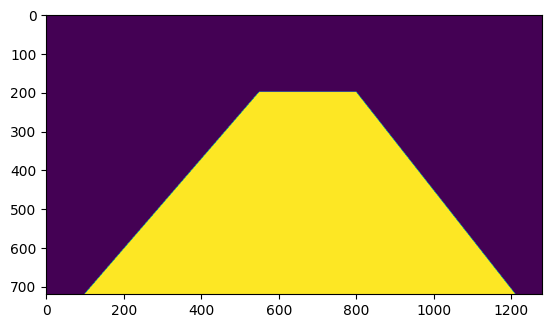

In [ ]:
height = ImgIn_canny.shape[0]
polygons = np.array([ [(100, height), (1210, height),(800, 200), (550, 200) ] ]) # left side, right side, right middle, left middle
mask = np.zeros_like(ImgIn_canny)
cv2.fillPoly(mask, polygons, 255)

plt.imshow(mask)
plt.show()


In this step, we apply the mask to the Canny edge-detected image using a bitwise AND operation with `cv2.bitwise_and`. The `masked_image` is the result of combining `ImgIn_canny` and the mask, keeping only the pixels within the polygonal Region of Interest (ROI).

This operation filters out everything outside the trapezoidal mask, leaving only the edges within the ROI visible. It effectively isolates the lane lines from the rest of the image, reducing noise and irrelevant features. Visualizing the `masked_image` shows the detected edges confined to the ROI, making the subsequent lane detection process more efficient and accurate.

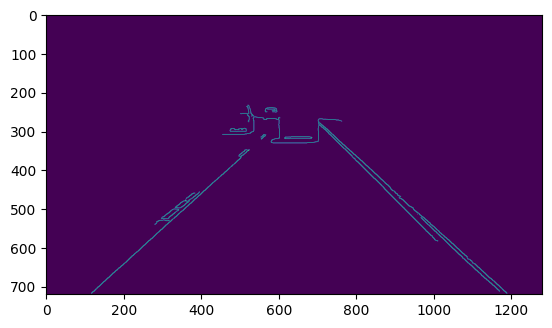

In [ ]:
masked_image = cv2.bitwise_and(ImgIn_canny, mask)

plt.imshow(masked_image)
plt.show()

teste123

In [ ]:
lines = cv2.HoughLinesP(masked_image, 2, np.pi/180, 150, np.array([]), minLineLength=50, maxLineGap=5)

#lines

In [ ]:
line_img = np.zeros((masked_image.shape[0], masked_image.shape[1], 3), dtype=np.uint8) # check dtype ?


color = [255, 0, 0] # red color
thickness = 2 # line thickness

for line in lines:
    for x1, y1, x2, y2 in line:
        cv2.line(line_img, (x1, y1), (x2, y2), color, thickness)

In [ ]:
plt.imshow(line_img)

Questions:
-
-